In [2]:

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from cswe_harm import *


235.73751423513016
1.7101452723133627e-05
4.3371639467591745e-15
262.01813836720487
2.7365746407718274e-07
1.7145359549935767e-14
425.97824266835624
3.9436645948996246e-08
6.950006742353542e-13
595.8500475088192
2.6679190358994827e-07
1.0744172655665575e-11
4.3510502426321695e-14
1638.7583150329738
5.920252386424856e-07
2.891952503627288e-09
2.182069755886869e-13


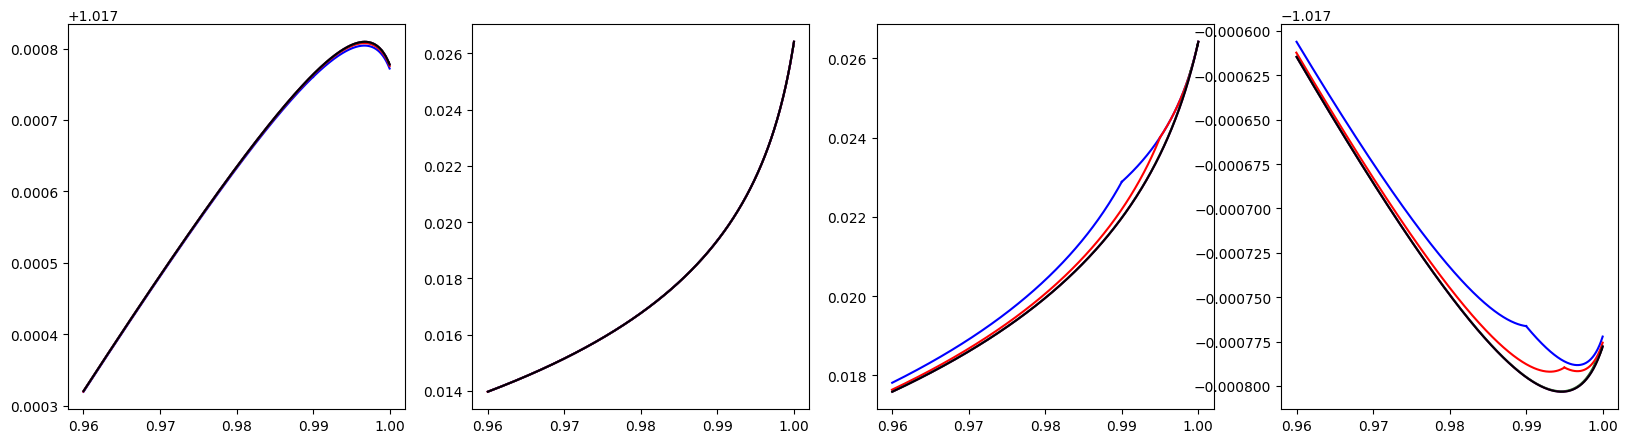

In [3]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
bnds = [0.99, 0.995, 0.999, 0.9995, 0.9999]
for bnd_i in range(len(bnds)):
    csweharm.boundary = bnds[bnd_i]
    csweharm.solve_LO_split_domain()

    
    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - bnds[0]) * 4)))
    for i in range(4):
        axs[i].plot(csweharm.yl0.x[st:], csweharm.yl0.y[i, st:], cols[bnd_i])
        axs[i].plot(csweharm.yr0.x, csweharm.yr0.y[i], cols[bnd_i])
plt.show()


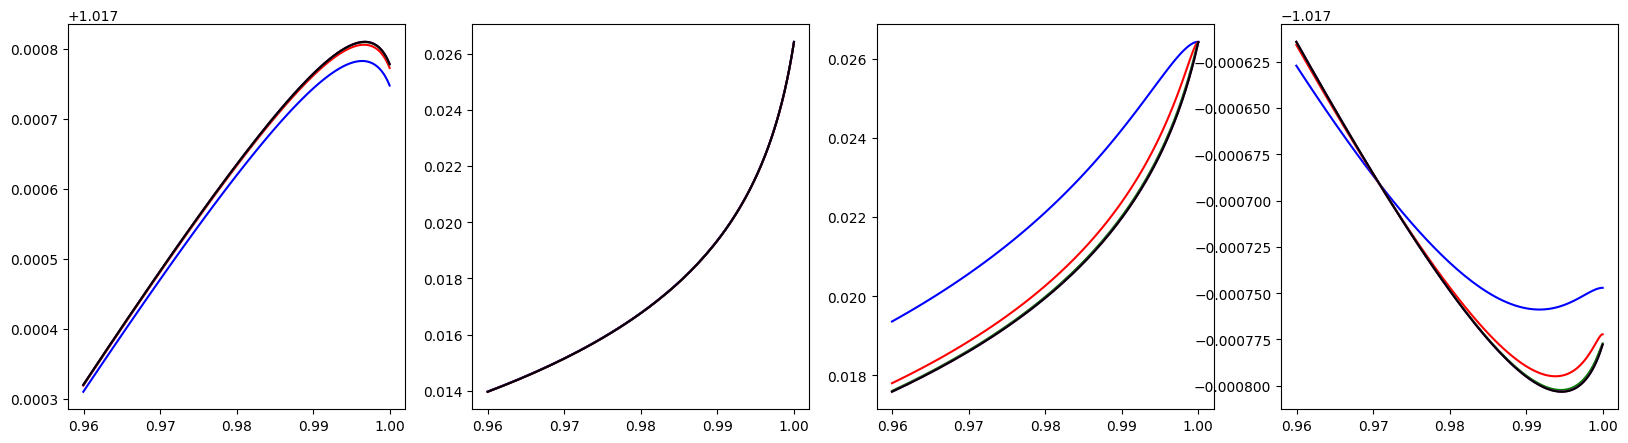

In [4]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
sns = [1e-2, 1e-3, 1e-4, 1e-5, 1e-7, 1e-9, 1e-11]
for k in range(len(bnds)):
    csweharm.small_number = sns[k]
    csweharm.solve_LO_small_number()

    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.y0.x - (1 - (1 - bnds[0]) * 4)))
    for i in range(4):
        axs[i].plot(csweharm.y0.x[st:], csweharm.y0.y[i, st:], cols[k])
plt.show()




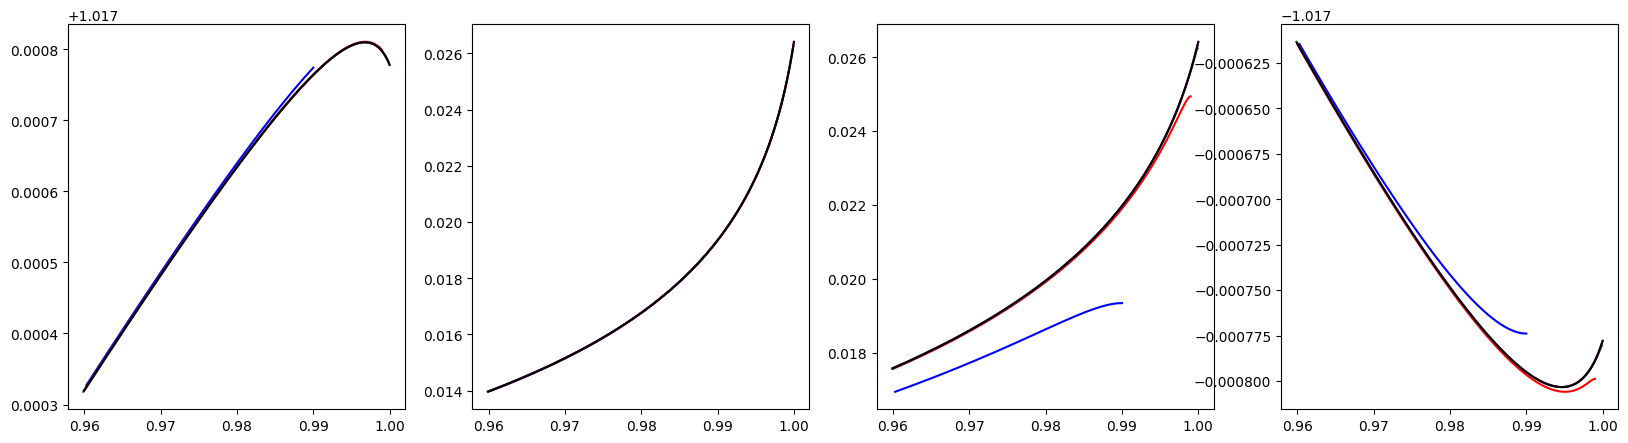

In [5]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

cols = ['b', 'r', 'g', 'm', 'k', 'c']
sns = [1e-2, 1e-3, 1e-4, 1e-5, 1e-7, 1e-9, 1e-11]
for k in range(len(bnds)):
    csweharm.domain_reduction = sns[k]
    csweharm.solve_LO_reduced_domain()

    # st = int(len(csweharm.yl0.x) * (1 - (1 - csweharm.boundary) * 10 / csweharm.boundary))
    # st = np.argmin(abs(csweharm.yl0.x - (1 - (1 - csweharm.boundary) * 5)))
    st = np.argmin(abs(csweharm.y0.x - (1 - (1 - bnds[0]) * 4)))
    for i in range(4):
        axs[i].plot(csweharm.y0.x[st:], csweharm.y0.y[i, st:], cols[k])
plt.show()




595.8500475088192
2.6679190358994827e-07
1.0744172655665575e-11
4.3510502426321695e-14


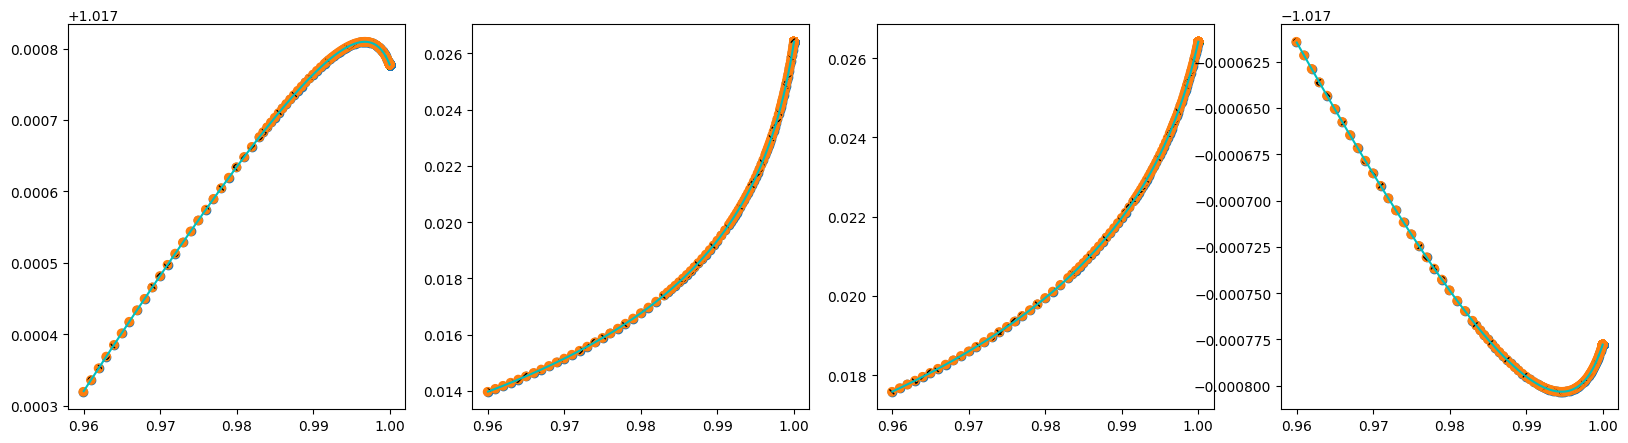

In [14]:
csweharm = CSWEHarm()
csweharm.debug= False

factor = 1
csweharm.A *= factor
csweharm.epsilon *= factor


csweharm.r = 0.24

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

plot_bnd = 0.96

csweharm.boundary = 0.9995
csweharm.solve_LO_split_domain()
st = np.argmin(abs(csweharm.yl0.x - plot_bnd))
for i in range(4):
    axs[i].plot(csweharm.yl0.x[st:], csweharm.yl0.y[i, st:], 'c')
    axs[i].plot(csweharm.yr0.x, csweharm.yr0.y[i], 'c')


csweharm.small_number = 1e-9
csweharm.solve_LO_small_number()
st = np.argmin(abs(csweharm.y0.x - plot_bnd))
for i in range(4):
    axs[i].scatter(csweharm.y0.x[st:], csweharm.y0.y[i, st:])


csweharm.domain_reduction = 1e-9
csweharm.solve_LO_reduced_domain()
st = np.argmin(abs(csweharm.y0.x - plot_bnd))
for i in range(4):
    axs[i].scatter(csweharm.y0.x[st:], csweharm.y0.y[i, st:], hatch='x')#, c='k')


plt.show()


       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  1.000e-03 ...  9.990e-01  9.990e-01]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000001C5FFCC3160>
             p: None
             y: [[ 1.261e-26 -7.088e-08 ...  1.010e-03  1.000e-03]
                 [ 0.000e+00  2.498e-05 ...  4.033e-03  1.000e-03]
                 ...
                 [ 2.409e-01  2.411e-01 ...  2.007e+02  2.090e+02]
                 [-7.047e-01 -7.054e-01 ... -6.204e+02 -6.462e+02]]
            yp: [[-7.089e-05 -7.087e-05 ... -2.259e-01 -2.520e-01]
                 [ 2.497e-02  2.500e-02 ... -7.066e+01 -7.498e+01]
                 ...
                 [ 2.364e-01  2.369e-01 ...  1.917e+05  2.080e+05]
                 [-6.910e-01 -6.924e-01 ... -5.956e+05 -6.463e+05]]
 rms_residuals: [ 5.881e-11  5.903e-11 ...  1.650e-05  1.846e-05]
         niter: 5


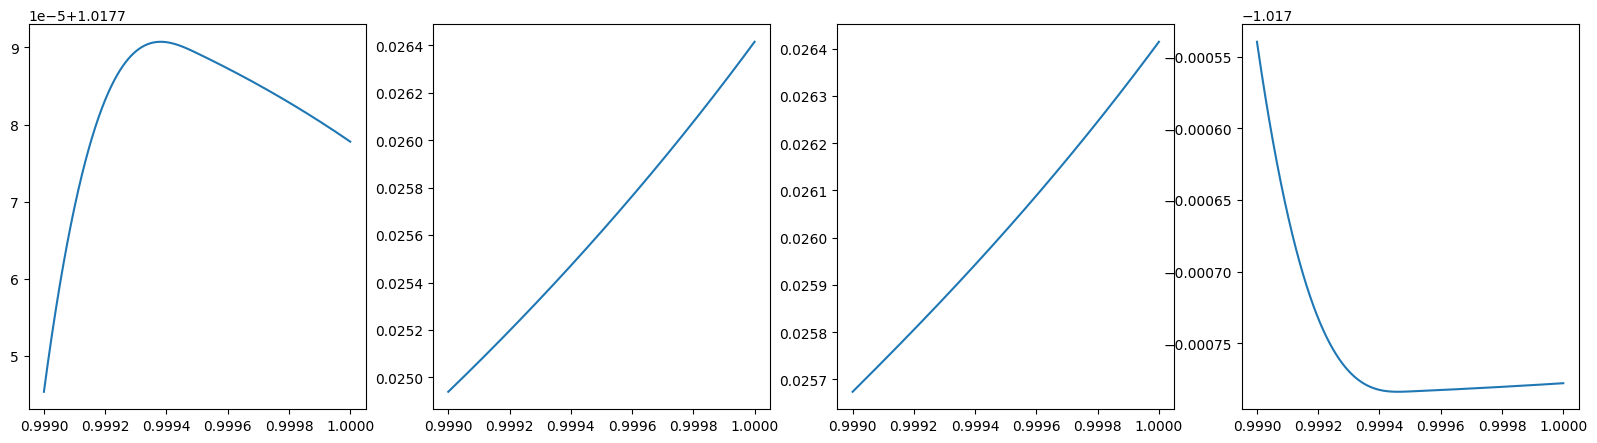

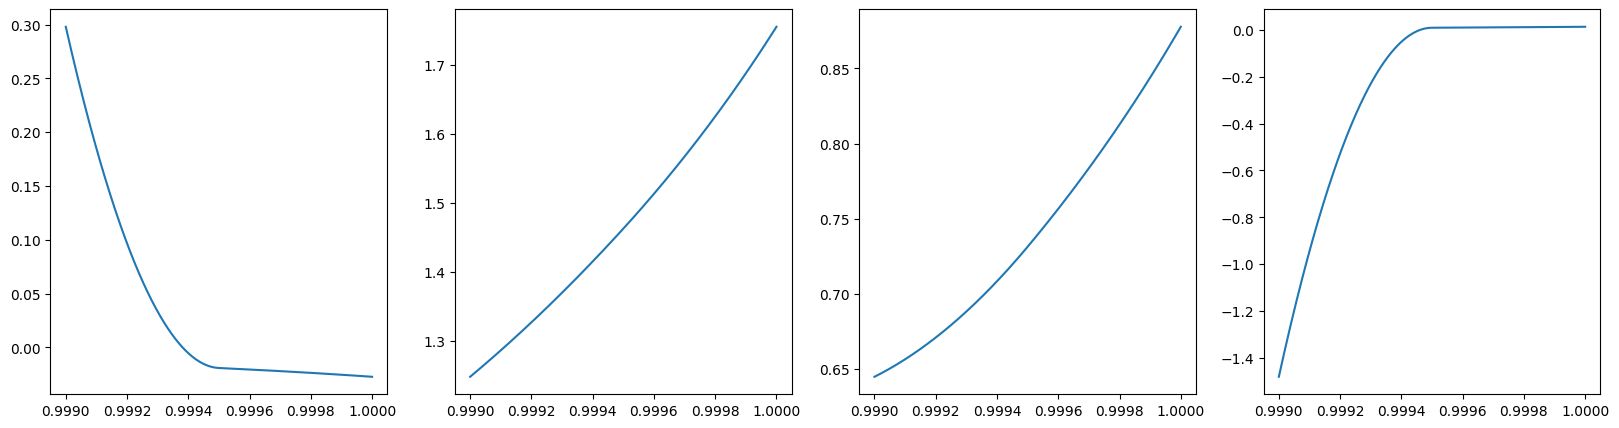

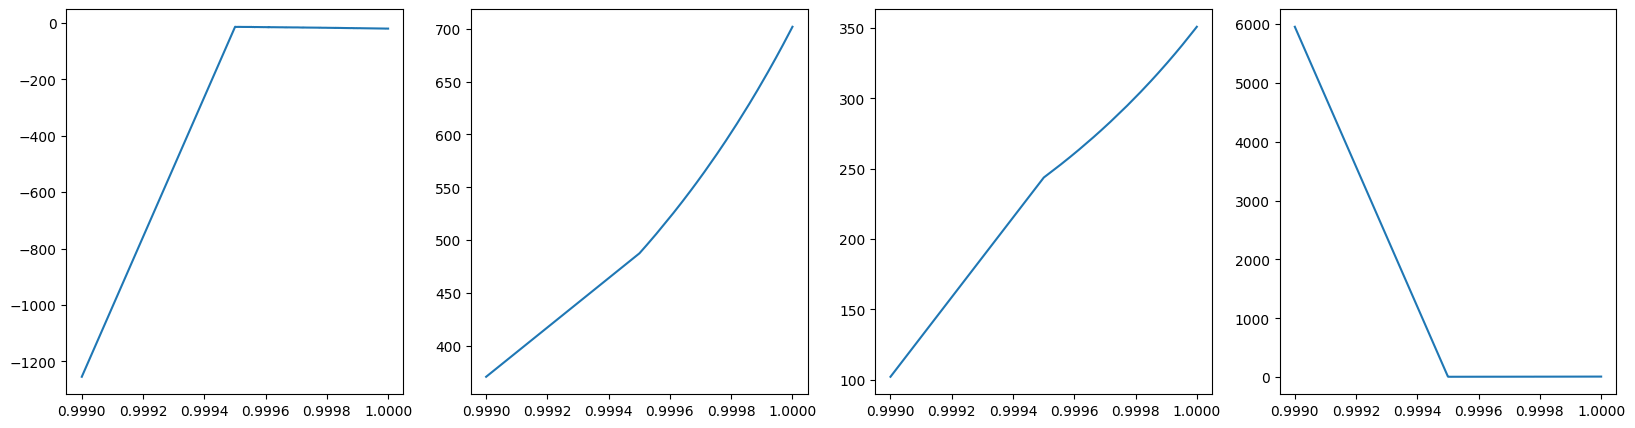

SystemError: 

In [ ]:
csweharm.debug=True
csweharm.r = 0.1
csweharm.boundary = 1 - 1e-3
csweharm.solve_FO_split_domain()

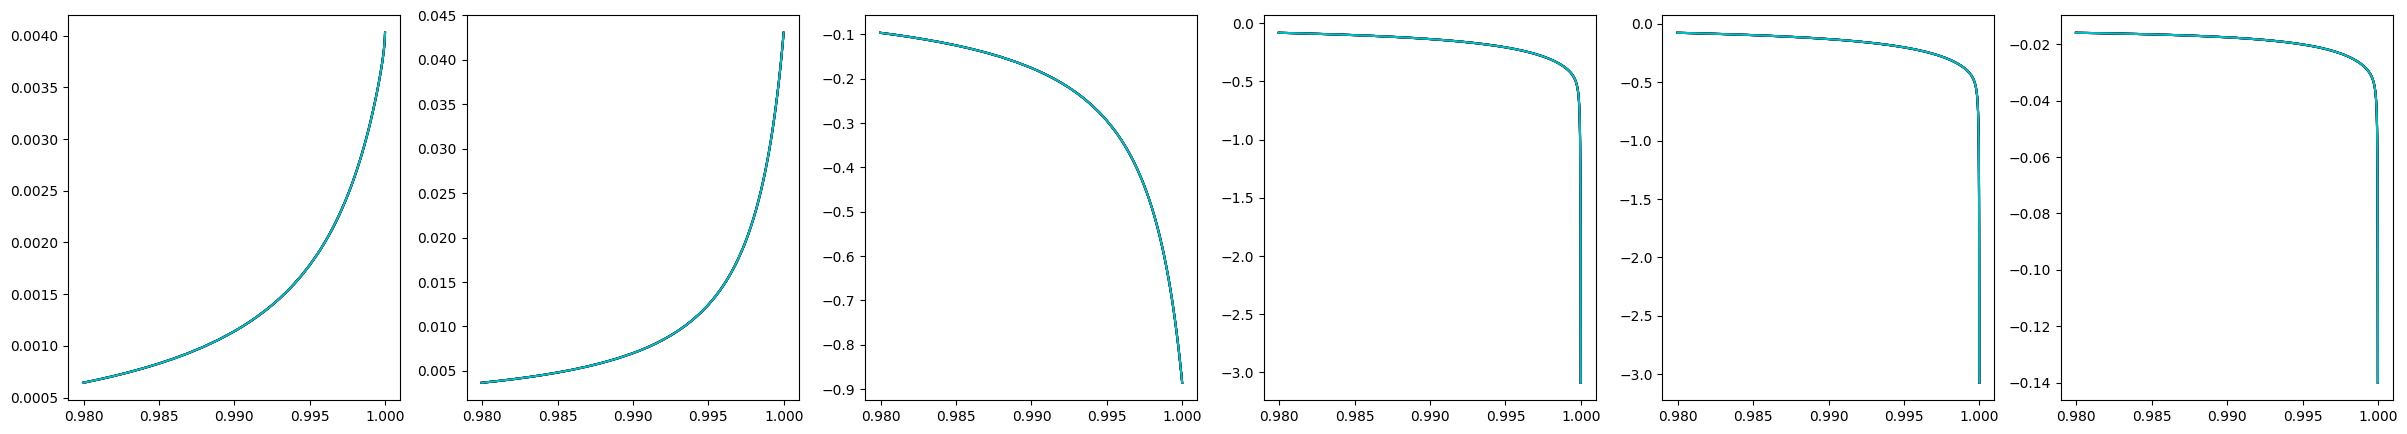

In [ ]:
comp = CSWEHarm()
comp.r = 0.24

cols = ['b', 'r', 'g', 'm', 'k', 'c']
sns = [1e-2, 1e-4, 1e-5, 1e-7, 1e-9, 1e-11]

fig, axs = plt.subplots(1, 6, figsize=(30, 5))

for k in range(len(sns)):

    comp.boundary_reduction = sns[k]
    comp.solve_LO_reduced_domain()
    comp.solve_FO_reduced_domain()

    st = np.argmin(abs(comp.x1 - 0.995))


    axs[0].plot(comp.x1[st:], comp.dz1_r[st:], cols[k])
    axs[1].plot(comp.x1[st:], comp.dz1_c[st:], cols[k])
    axs[2].plot(comp.x1[st:], comp.dz1_s[st:], cols[k])
    axs[3].plot(comp.x1[st:], comp.u1_r[st:], cols[k])
    axs[4].plot(comp.x1[st:], comp.u1_c[st:], cols[k])
    axs[5].plot(comp.x1[st:], comp.u1_s[st:], cols[k])
plt.show()
